# Sublytical
This is a reddit analysis tool. For now, its mainly used to practice python, getting a grasp about analytics and taking some early steps into the realm of machine learning.

## Storing Credentials
In my first setup, I was using a `.env` file to store my credentials. To read the contents of that file I used the `os` module in conjunction with `load_dotenv()`. With that I was able to make us of those environmental variables.

I later realized, that PRAW is making use of its own `praw.ini` file, so why not make use of that?
Its realy straight forward. PRAW is using its default `praw.ini` file and we can change different options as we wish by simply creating our own `praw.ini` file in our current working directory.

In that `praw.ini` file, I put in my credentials, leading whit a header in the form of `[bot1]` to let PRAW know which credentials it is supposed to use.

Here a example of how my file is looking:

In [ ]:
[bot1]
client_id=<CLIENT_ID>
client_secret=<CLIENT_SECRET>
bot_name=MybBot
bot_version=0.0.1
bot_author=Raybawn
user_agent=script:%(bot_name)s:v%(bot_version)s (by u/%(bot_author)s)

## PRAW
My first step was to instantiate an reddit instant. With the previously setup `praw.ini` I can do exactly that with only two lines of code:

In [6]:
# Import dependencies
import praw

# Instantiate
reddit = praw.Reddit("bot1", config_interpolation="basic")

## Initializing Variables
As a first step, I'll define my variables. To let the user decide for what subreddit he wants a analysis, I use a simple input prompt for the moment.

In [7]:
userinput = input("Enter subreddit:")
subreddit = reddit.subreddit(userinput)

postLimit = 100
postList = []
wordList = []
postWords = []
wordString = ""

## Collect and cleane the data
`nltk` is the "Natural Language Toolkit" and is used to tokenize and filter text. To remove emojis, we can use the `emoji` module.

`matplotlib` is used to visualize the data we got.

Now I want to save the posts titles into `postList`. Additionally I want to have all unique words for each title, without stopwords, emojis and specialcharacters in a separate variable, this time a simple String. This will be used for a visualization later on.

In [8]:
import re
import emoji
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

for submission in subreddit.hot(limit=postLimit):
    postList.append([submission.title])
    postWords = list(
        set(word_tokenize(submission.title.lower().replace("'", "")))
    )
    wordList.extend(postWords)

stops = set(stopwords.words("english")) # Filter out stopwords (the, a, is, etc.)
nonPunct = re.compile(".*[A-Za-z0-9].*") # Filter out non-alphanumeric characters
def remove_emoji(str):
    return emoji.replace_emoji(str, replace='') # Filter out emojis

wordList = [remove_emoji(w) for w in wordList if not w in stops and nonPunct.match(w)]

for word in wordList:
    wordString += str(word + " ")
    
wordString = wordString[:-1]

print(wordString)


megathread february faq questions 19 daily sat-sun victory weekly weekend feb thread 19 18 homie switch like though make icon raiding usual experience… discord decided matches sister great overpriced idea watering found fluffy experience sastasha truth vercure paths clipping comic inventory havocpioneer immaculate definite eorzea recommendation wol visiting country cafe japan web wish art/content makoto personally want character minor euphrosyne knight dark 24 requested eorzea food〜 cafe start finally endwalker play drk hmu elemental youre shirt made takes hot ffxiv biggest favorite content still eureka done may finally um started 2022 phoenix level absolutely crafters asked 81 return helped godsend 90 parzival nothing adamantoise players like shout spice must flow infographic garden island animals sanctuary guide card hours last got mount needed finally 7 spending queue concept sweet client wol shenanigans turn whoa whats going sudden gloomy sky contains carrot character image made en

## Visualize
For some fun I wanted to create a wordcloud with the above returned words.

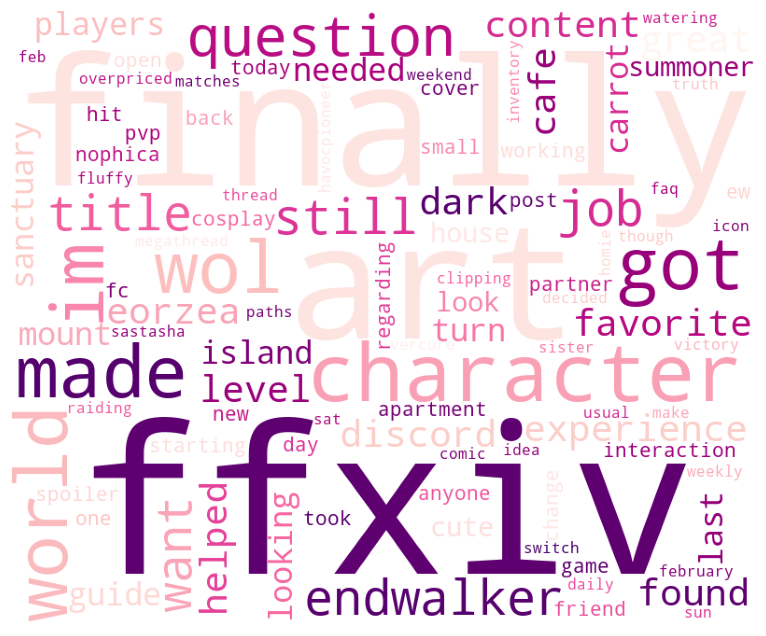

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# import pandas as pd
# from PIL import Image

wc = WordCloud(background_color="white",
               max_words=100,
               width=800,
               height=660,
               colormap='RdPu',
               contour_color='black',
               contour_width=1,
               collocations=True)
wc.generate(wordString)

plt.figure(figsize=(10,8))
plt.imshow(wc)
plt.axis('off')
plt.show()

To let users input their own subreddits, I need a GUI. Because I wanna be able to use it everywhere, and also want to enable other people to use it, I'll create a website with Flask.

In [40]:
# from flask import Flask

# # app.py
# app = Flask(__name__)

# @app.route("/")
# def hello_world():
#     return "Hello, World!"